In [1]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.ensemble import GradientBoostingRegressor,RandomForestRegressor

In [4]:
cd ..

/Users/rcheer/Desktop/Galvanize/Capstone


In [69]:
advstats_2017 = pd.read_csv('2017 NBA Advanced.csv')
advstats_2016 = pd.read_csv('2016 NBA Advanced.csv')
advstats_2015 = pd.read_csv('2015 NBA Advanced.csv')
advstats_2014 = pd.read_csv('2014 NBA Advanced.csv')
advstats_2013 = pd.read_csv('2013 NBA Advanced.csv')

advstats_2017.head()

,Rk,Player,Pos,Age,Tm,G,MP,PER,TS%,3PAr,...,TOV%,USG%,OWS,DWS,WS,WS/48,OBPM,DBPM,BPM,VORP
0,1,Alex Abrines,SG,24,OKC,75,1134,9.0,0.567,0.759,...,7.4,12.7,1.3,1.0,2.2,0.094,-0.5,-1.7,-2.2,-0.1
1,2,Quincy Acy,PF,27,BRK,70,1359,8.2,0.525,0.800,...,13.3,14.4,-0.1,1.1,1.0,0.036,-2.0,-0.2,-2.2,-0.1
2,3,Steven Adams,C,24,OKC,76,2487,20.6,0.630,0.003,...,13.2,16.7,6.7,3.0,9.7,0.187,2.2,1.1,3.3,3.3
3,4,Bam Adebayo,C,20,MIA,69,1368,15.7,0.570,0.021,...,13.6,15.9,2.3,1.9,4.2,0.148,-1.6,1.8,0.2,0.8
4,5,Arron Afflalo,SG,32,ORL,53,682,5.8,0.516,0.432,...,10.8,12.5,-0.1,0.2,0.1,0.009,-4.1,-1.8,-5.8,-0.7


In [8]:
advstats_2016.columns = ['Season','Player', '2016_Pos', '2016_Age', '2016_Tm', '2016_G', '2016_MP', '2016_PER', '2016_TS%', '2016_3PAr',
       '2016_FTr', '2016_ORB%', '2016_DRB%', '2016_TRB%', '2016_AST%', '2016_STL%', '2016_BLK%', '2016_TOV%', '2016_USG%',
       '2016_OWS', '2016_DWS', '2016_WS', '2016_WS/48', '2016_OBPM',
       '2016_DBPM', '2016_BPM', '2016_VORP']

advstats_2015.columns = ['Season','Player', '2015_Pos', '2015_Age', '2015_Tm', '2015_G', '2015_MP', '2015_PER', '2015_TS%', '2015_3PAr',
       '2015_FTr', '2015_ORB%', '2015_DRB%', '2015_TRB%', '2015_AST%', '2015_STL%', '2015_BLK%', '2015_TOV%', '2015_USG%',
       '2015_OWS', '2015_DWS', '2015_WS', '2015_WS/48', '2015_OBPM',
       '2015_DBPM', '2015_BPM', '2015_VORP']

advstats_2014.columns = ['Season','Player', '2014_Pos', '2014_Age', '2014_Tm', '2014_G', '2014_MP', '2014_PER', '2014_TS%', '2014_3PAr',
       '2014_FTr', '2014_ORB%', '2014_DRB%', '2014_TRB%', '2014_AST%', '2014_STL%', '2014_BLK%', '2014_TOV%', '2014_USG%',
       '2014_OWS', '2014_DWS', '2014_WS', '2014_WS/48', '2014_OBPM',
       '2014_DBPM', '2014_BPM', '2014_VORP']

advstats_2013.columns = ['Season','Player', '2013_Pos', '2013_Age', '2013_Tm', '2013_G', '2013_MP', '2013_PER', '2013_TS%', '2013_3PAr',
       '2013_FTr', '2013_ORB%', '2013_DRB%', '2013_TRB%', '2013_AST%', '2013_STL%', '2013_BLK%', '2013_TOV%', '2013_USG%',
       '2013_OWS', '2013_DWS', '2013_WS', '2013_WS/48', '2013_OBPM',
       '2013_DBPM', '2013_BPM', '2013_VORP']


In [61]:
regstats_2017 = pd.read_csv('2017 NBA data.csv')
regstats_2016 = pd.read_csv('2016 NBA data.csv')
regstats_2015 = pd.read_csv('2015 NBA data.csv')
regstats_2014 = pd.read_csv('2014 NBA data.csv')
regstats_2013 = pd.read_csv('2013 NBA data.csv')
regstats_2017.columns

regstats_2017.head()

,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PS/G
0,2017,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.848,0.3,1.2,1.5,0.4,0.5,0.1,0.3,1.7,4.7
1,2017,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.817,0.6,3.1,3.7,0.8,0.5,0.4,0.9,2.1,5.9
2,2017,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,0.559,5.1,4.0,9.0,1.2,1.2,1.0,1.7,2.8,13.9
3,2017,Bam Adebayo,C,20,MIA,69,19,19.8,2.5,4.9,...,0.721,1.7,3.8,5.5,1.5,0.5,0.6,1.0,2.0,6.9
4,2017,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.846,0.1,1.2,1.2,0.6,0.1,0.2,0.4,1.1,3.4


In [62]:
regstats_2016.columns = ['Rk', 'Player', '2016_Pos', '2016_Age', '2016_Tm', '2016_G', '2016_GS', '2016_MP', '2016_FG', '2016_FGA', '2016_FG%',
       '2016_3P', '2016_3PA', '2016_3P%', '2016_2P', '2016_2PA', '2016_2P%', '2016_eFG%', '2016_FT', '2016_FTA', '2016_FT%',
       '2016_ORB', '2016_DRB', '2016_TRB', '2016_AST', '2016_STL', '2016_BLK', '2016_TOV', '2016_PF', '2016_PS/G']
regstats_2015.columns = ['Rk', 'Player', '2015_Pos', '2015_Age', '2015_Tm', '2015_G', '2015_GS', '2015_MP', '2015_FG', '2015_FGA', '2015_FG%',
       '2015_3P', '2015_3PA', '2015_3P%', '2015_2P', '2015_2PA', '2015_2P%', '2015_eFG%', '2015_FT', '2015_FTA', '2015_FT%',
       '2015_ORB', '2015_DRB', '2015_TRB', '2015_AST', '2015_STL', '2015_BLK', '2015_TOV', '2015_PF', '2015_PS/G']
regstats_2014.columns = ['Rk', 'Player', '2014_Pos', '2014_Age', '2014_Tm', '2014_G', '2014_GS', '2014_MP', '2014_FG', '2014_FGA', '2014_FG%',
       '2014_3P', '2014_3PA', '2014_3P%', '2014_2P', '2014_2PA', '2014_2P%', '2014_eFG%', '2014_FT', '2014_FTA', '2014_FT%',
       '2014_ORB', '2014_DRB', '2014_TRB', '2014_AST', '2014_STL', '2014_BLK', '2014_TOV', '2014_PF', '2014_PS/G']
regstats_2013.columns = ['Rk', 'Player', '2013_Pos', '2013_Age', '2013_Tm', '2013_G', '2013_GS', '2013_MP', '2013_FG', '2013_FGA', '2013_FG%',
       '2013_3P', '2013_3PA', '2013_3P%', '2013_2P', '2013_2PA', '2013_2P%', '2013_eFG%', '2013_FT', '2013_FTA', '2013_FT%',
       '2013_ORB', '2013_DRB', '2013_TRB', '2013_AST', '2013_STL', '2013_BLK', '2013_TOV', '2013_PF', '2013_PS/G']

In [63]:
previous_year_traded = pd.DataFrame(regstats_2016.groupby('Player').count()['2016_G']>1).reset_index()
previous_year_traded.columns = ['Player','Traded']

In [64]:
traded_2017 = pd.DataFrame(regstats_2017.groupby('Player').count()['G']>1).reset_index()
traded_2017.columns = ['Player','Traded']
cleaned_2017 = pd.merge(regstats_2017,traded_2017, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2017 = cleaned_2017[((cleaned_2017.Traded ==False).astype(int)) |  ((cleaned_2017.Tm == 'TOT').astype(int).astype(bool))]

traded_2016 = pd.DataFrame(regstats_2016.groupby('Player').count()['2016_G']>1).reset_index()
traded_2016.columns = ['Player','Traded']
cleaned_2016 = pd.merge(regstats_2016,traded_2016, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2016 = cleaned_2016[((cleaned_2016.Traded ==False).astype(int)) | ((cleaned_2016['2016_Tm'] == 'TOT').astype(int).astype(bool))]

traded_2015 = pd.DataFrame(regstats_2015.groupby('Player').count()['2015_G']>1).reset_index()
traded_2015.columns = ['Player','Traded']
cleaned_2015 = pd.merge(regstats_2015,traded_2015, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2015 = cleaned_2015[((cleaned_2015.Traded ==False).astype(int)) | ((cleaned_2015['2015_Tm'] == 'TOT').astype(int).astype(bool))]

traded_2014 = pd.DataFrame(regstats_2014.groupby('Player').count()['2014_G']>1).reset_index()
traded_2014.columns = ['Player','Traded']
cleaned_2014 = pd.merge(regstats_2014,traded_2014, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2014 = cleaned_2014[((cleaned_2014.Traded ==False).astype(int)) | ((cleaned_2014['2014_Tm'] == 'TOT').astype(int).astype(bool))]

traded_2013 = pd.DataFrame(regstats_2013.groupby('Player').count()['2013_G']>1).reset_index()
traded_2013.columns = ['Player','Traded']
cleaned_2013 = pd.merge(regstats_2013,traded_2013, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2013 = cleaned_2013[((cleaned_2013.Traded ==False).astype(int)) | ((cleaned_2013['2013_Tm'] == 'TOT').astype(int).astype(bool))]


In [65]:
pd.merge(df_2017,df_2016, how = 'inner', left_on = 'Player',right_on = 'Player')


,Season,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,2016_ORB,2016_DRB,2016_TRB,2016_AST,2016_STL,2016_BLK,2016_TOV,2016_PF,2016_PS/G,Traded_y
0,2017,Alex Abrines,SG,24,OKC,75,8,15.1,1.5,3.9,...,0.3,1.0,1.3,0.6,0.5,0.1,0.5,1.7,6.0,False
1,2017,Quincy Acy,PF,27,BRK,70,8,19.4,1.9,5.2,...,0.5,2.5,3.0,0.5,0.4,0.4,0.6,1.8,5.8,True
2,2017,Steven Adams,C,24,OKC,76,76,32.7,5.9,9.4,...,3.5,4.2,7.7,1.1,1.1,1.0,1.8,2.4,11.3,False
3,2017,Arron Afflalo,SG,32,ORL,53,3,12.9,1.2,3.1,...,0.1,1.9,2.0,1.3,0.3,0.1,0.7,1.7,8.4,False
4,2017,Cole Aldrich,C,29,MIN,21,0,2.3,0.2,0.7,...,0.8,1.7,2.5,0.4,0.4,0.4,0.3,1.4,1.7,False
5,2017,LaMarcus Aldridge,C,32,SAS,75,75,33.5,9.2,18.0,...,2.4,4.9,7.3,1.9,0.6,1.2,1.4,2.2,17.3,False
6,2017,Tony Allen,SF,36,NOP,22,0,12.4,2.0,4.1,...,2.3,3.2,5.5,1.4,1.6,0.4,1.4,2.5,9.1,False
7,2017,Al-Farouq Aminu,PF,27,POR,69,67,30.0,3.3,8.4,...,1.3,6.1,7.4,1.6,1.0,0.7,1.5,1.7,8.7,False
8,2017,Justin Anderson,SF,24,PHI,38,0,13.7,2.3,5.3,...,0.9,2.3,3.3,0.9,0.5,0.3,0.9,1.5,7.1,True
9,2017,Kyle Anderson,SF,24,SAS,74,67,26.7,3.1,5.9,...,0.5,2.4,2.9,1.3,0.7,0.4,0.5,0.9,3.4,False


In [66]:
past_four_years = pd.merge(df_2017,df_2016, how = 'inner', left_on = 'Player',right_on = 'Player')
'''pd.merge(
pd.merge(
pd.merge(
                pd.merge(df_2017,df_2016, how = 'left', left_on = 'Player',right_on = 'Player')
                          ,df_2015, how = 'left',left_on = 'Player',right_on = 'Player')
                        ,df_2014, how = 'left',left_on = 'Player',right_on = 'Player')
                        ,df_2013, how = 'left',left_on = 'Player',right_on = 'Player')'''


"pd.merge(\npd.merge(\npd.merge(\n                pd.merge(df_2017,df_2016, how = 'left', left_on = 'Player',right_on = 'Player')\n                          ,df_2015, how = 'left',left_on = 'Player',right_on = 'Player')\n                        ,df_2014, how = 'left',left_on = 'Player',right_on = 'Player')\n                        ,df_2013, how = 'left',left_on = 'Player',right_on = 'Player')"

In [67]:
past_four_years['2016_TotMinutes'] = (past_four_years['2016_G']*past_four_years['2016_MP']/82)
past_four_years[['Tm','Player','2016_G','2016_MP']]

,Tm,Player,2016_G,2016_MP
0,OKC,Alex Abrines,68,15.5
1,BRK,Quincy Acy,38,14.7
2,OKC,Steven Adams,80,29.9
3,ORL,Arron Afflalo,61,25.9
4,MIN,Cole Aldrich,62,8.6
5,SAS,LaMarcus Aldridge,72,32.4
6,NOP,Tony Allen,71,27.0
7,POR,Al-Farouq Aminu,61,29.1
8,PHI,Justin Anderson,75,16.4
9,SAS,Kyle Anderson,72,14.2


In [68]:
Net_MinGainPG_ByTeam = (past_four_years.groupby('Tm').sum()['2016_TotMinutes']-240).reset_index()
Net_MinGainPG_ByTeam

,Tm,2016_TotMinutes
0,ATL,-109.784146
1,BOS,-42.293902
2,BRK,-49.812195
3,CHI,-84.662195
4,CHO,-18.798780
5,CLE,-69.698780
6,DAL,-63.769512
7,DEN,0.050000
8,DET,-85.360976
9,GSW,4.228049


In [324]:
Net_MinGainPG_Tm_Pos = (past_four_years.groupby(['Tm','Pos']).sum()['2016_TotMinutes']-48).reset_index()
Net_MinGainPG_Tm_Pos.columns = ['Tm','Pos','Pos_minGain']
past_four_years = pd.merge(past_four_years,Net_MinGainPG_Tm_Pos,how = 'inner', left_on = ['Tm','Pos'],right_on = ['Tm','Pos'])
past_four_years = past_four_years[past_four_years['Tm']!='TOT']

Text(0,0.5,'Minutes opened')

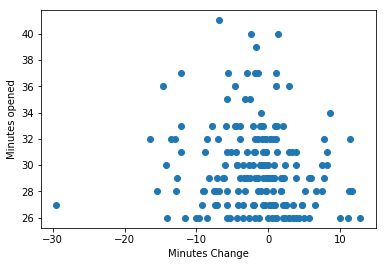

In [379]:
plt.scatter(past_four_years[past_four_years['Age']>25]['MP']-past_four_years[past_four_years['Age']>25]['2016_MP'],past_four_years[past_four_years['Age']>25]['Age'])
plt.xlabel('Minutes Change')
plt.ylabel('Minutes opened')

In [327]:
past_four_years[past_four_years['Pos_minGain']>48]

,Rk_x,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,2013_TRB,2013_AST,2013_STL,2013_BLK,2013_TOV,2013_PF,2013_PS/G,Traded,2016_TotMinutes,Pos_minGain


In [328]:
past_four_years[past_four_years.Tm=='ATL'][['Player','G','MP','PS/G','2016_MP','2016_PS/G','Pos_minGain']]

,Player,G,MP,PS/G,2016_MP,2016_PS/G,Pos_minGain
132,Kent Bazemore,65,27.5,12.9,26.9,11.0,-24.052439
133,Tyler Dorsey,56,17.4,7.2,NaN,NaN,-24.052439
134,Damion Lee,15,26.9,10.7,NaN,NaN,-24.052439
135,Jaylen Morris,6,16.3,4.7,NaN,NaN,-24.052439
161,DeAndre' Bembry,26,17.5,5.2,9.8,2.7,-25.192683
162,Nicolas Brussino,4,2.5,0.0,9.6,2.8,-25.192683
163,Jeremy Evans,1,5.0,2.0,NaN,NaN,-25.192683
164,Taurean Waller-Prince,82,30.0,14.1,16.6,5.7,-25.192683
165,Andrew White,15,13.9,4.6,NaN,NaN,-25.192683
312,Tyler Cavanaugh,39,13.3,4.7,NaN,NaN,-48.000000


In [329]:
y = past_four_years[(past_four_years['2013_PS/G'].notna()) & (past_four_years['2014_PS/G'].notna())
                   & (past_four_years['2015_PS/G'].notna()) & (past_four_years['2016_PS/G'].notna())]['PS/G']
X = past_four_years[(past_four_years['2013_PS/G'].notna()) & (past_four_years['2014_PS/G'].notna())
                   & (past_four_years['2015_PS/G'].notna()) & (past_four_years['2016_PS/G'].notna())][['2016_PS/G','2015_PS/G','2014_PS/G','2013_PS/G']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [330]:
lin_mod = LinearRegression()
lin_mod.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [331]:
''' When we run the actual test will grid search RF and GB to compare to Linear Regression
Preliminary I believe that GB or RF will be the better performer'''

r2_lr = np.mean(cross_val_score(LinearRegression(),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('Linear_Regression: Last_four_years_points r^2 {}'.format(r2_lr))

r2_gb = np.mean(cross_val_score(GradientBoostingRegressor(loss='ls',learning_rate=0.01,n_estimators=500,max_depth = 2,max_features=2
                                                        ),X_train,y_train,scoring = 'r2',cv=10,n_jobs=-1))
print('GradientBoost: Last_four_years_points r^2 {}'.format(r2_gb))

r2_rf = np.mean(cross_val_score(RandomForestRegressor(n_estimators=500,max_depth = 4,max_features=3),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('RandomForest: Last_four_years_points r^2 {}'.format(r2_rf))

Linear_Regression: Last_four_years_points r^2 0.6756570727323684
GradientBoost: Last_four_years_points r^2 0.6670416351384494
RandomForest: Last_four_years_points r^2 0.6647943062274295


In [332]:
y = past_four_years[(past_four_years['2013_PS/G'].notna()) & (past_four_years['2014_PS/G'].notna())
                   & (past_four_years['2015_PS/G'].notna()) & (past_four_years['2016_PS/G'].notna())]['PS/G']
X = past_four_years[(past_four_years['2013_PS/G'].notna()) & (past_four_years['2014_PS/G'].notna())
                   & (past_four_years['2015_PS/G'].notna()) & (past_four_years['2016_PS/G'].notna())][['2016_PS/G','2015_PS/G','2014_PS/G','2013_PS/G']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

In [337]:
'''It looks like using the last two years instead of last four years results in less overfitting
Eventually will want to run through statsmodels and calculate VIF to see if there are any features that we can remove to help prevent overfitting'''

X = past_four_years[(past_four_years['2013_PS/G'].notna()) & (past_four_years['2014_PS/G'].notna())
                   & (past_four_years['2015_PS/G'].notna()) & (past_four_years['2016_PS/G'].notna())][[
    '2016_PS/G','2015_PS/G','Age','Pos_minGain','2016_MP','2016_FG%','2016_eFG%','2016_FTA'
    ,'2016_3P%','2015_MP','2015_FG%','2015_eFG%','2015_FTA','2015_3P%'
]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train = X_train.fillna(0.0)

In [338]:
r2_lr = np.mean(cross_val_score(LinearRegression(),X_train,y_train,scoring = 'r2',cv=10,n_jobs=-1))
print('Linear_Regression: Last_four_years_points r^2 {}'.format(r2_lr))

r2_gb = np.mean(cross_val_score(GradientBoostingRegressor(loss='ls',learning_rate=0.01,n_estimators=5000,max_depth = 6,max_features=4
                                                        ),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('GradientBoost: Last_four_years_points r^2 {}'.format(r2_gb))

r2_rf = np.mean(cross_val_score(RandomForestRegressor(n_estimators=500,max_depth = 6,max_features=4),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('RandomForest: Last_four_years_points r^2 {}'.format(r2_rf))

Linear_Regression: Last_four_years_points r^2 0.735949665326213
GradientBoost: Last_four_years_points r^2 0.7201635197477632
RandomForest: Last_four_years_points r^2 0.7228449487621394


In [146]:
df_2017.columns

Index(['Rk', 'Player', 'Pos', 'Age', 'Tm', 'G', 'GS', 'MP', 'FG', 'FGA', 'FG%',
       '3P', '3PA', '3P%', '2P', '2PA', '2P%', 'eFG%', 'FT', 'FTA', 'FT%',
       'ORB', 'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PS/G',
       'Traded'],
      dtype='object')

Text(0,0.5,'Change in REB')

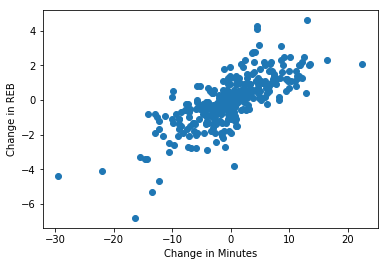

In [380]:
'''What causes players to get more minutes.  Better play?'''

plt.scatter(past_four_years['MP']-past_four_years['2016_MP'],past_four_years['TRB']-past_four_years['2016_TRB'])
plt.xlabel('Change in Minutes')
plt.ylabel('Change in REB')

Text(0,0.5,'Change in Points')

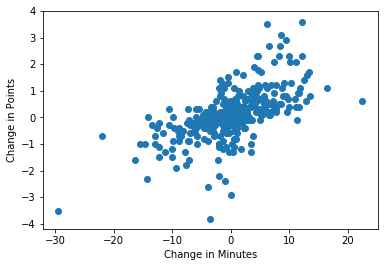

In [281]:
'''What causes players to get more minutes.  Better play?'''

plt.scatter(past_four_years['MP']-past_four_years['2016_MP'],past_four_years['AST']-past_four_years['2016_AST'])
plt.xlabel('Change in Minutes')
plt.ylabel('Change in AST')

Text(0,0.5,'Change in Points')

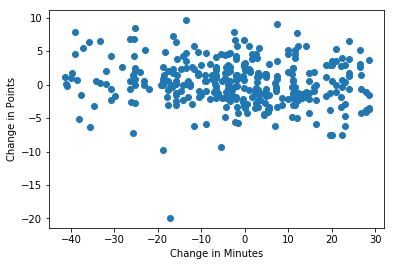

In [277]:
'''No signal'''

plt.scatter(past_four_years['Pos_minGain'],past_four_years['PS/G']-past_four_years['2016_PS/G'])
plt.xlabel('Change in Minutes')
plt.ylabel('Change in Points')

Text(0,0.5,'Points Per Minute 2016')

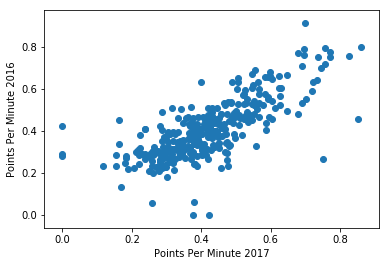

In [382]:
plt.scatter(past_four_years['PS/G']/past_four_years['MP'],past_four_years['2016_PS/G']/past_four_years['2016_MP'])
plt.xlabel('Points Per Minute 2017')
plt.ylabel('Points Per Minute 2016')

In [21]:
traded_2017 = pd.DataFrame(advstats_2017.groupby('Player').count()['G']>1).reset_index()
traded_2017.columns = ['Player','Traded']
cleaned_2017 = pd.merge(regstats_2017,traded_2017, how = 'inner',left_on = 'Player',right_on = 'Player')
df_2017 = cleaned_2017[((cleaned_2017.Traded ==False).astype(int)+ (cleaned_2017.Tm == 'TOT').astype(int)).astype(bool)]

traded_2016 = pd.DataFrame(advstats_2016.groupby('Player').count()['2016_G']>1).reset_index()
traded_2016.columns = ['Player','Traded']
cleaned_2016 = pd.merge(advstats_2016,traded_2016, how = 'inner',left_on = 'Player',right_on = 'Player')
advdf_2016 = cleaned_2016[((cleaned_2016.Traded ==False).astype(int)+ (cleaned_2016['2016_Tm'] == 'TOT').astype(int)).astype(bool)]

traded_2015 = pd.DataFrame(advstats_2015.groupby('Player').count()['2015_G']>1).reset_index()
traded_2015.columns = ['Player','Traded']
cleaned_2015 = pd.merge(advstats_2015,traded_2015, how = 'inner',left_on = 'Player',right_on = 'Player')
advdf_2015 = cleaned_2015[((cleaned_2015.Traded ==False).astype(int)+ (cleaned_2015['2015_Tm'] == 'TOT').astype(int)).astype(bool)]

traded_2014 = pd.DataFrame(advstats_2014.groupby('Player').count()['2014_G']>1).reset_index()
traded_2014.columns = ['Player','Traded']
cleaned_2014 = pd.merge(advstats_2014,traded_2014, how = 'inner',left_on = 'Player',right_on = 'Player')
advdf_2014 = cleaned_2014[((cleaned_2014.Traded ==False).astype(int)+ (cleaned_2014['2014_Tm'] == 'TOT').astype(int)).astype(bool)]

traded_2013 = pd.DataFrame(advstats_2013.groupby('Player').count()['2013_G']>1).reset_index()
traded_2013.columns = ['Player','Traded']
cleaned_2013 = pd.merge(advstats_2013,traded_2013, how = 'inner',left_on = 'Player',right_on = 'Player')
advdf_2013 = cleaned_2013[((cleaned_2013.Traded ==False).astype(int)+ (cleaned_2013['2013_Tm'] == 'TOT').astype(int)).astype(bool)]


In [22]:
past_four_years_adv = pd.merge(
                #pd.merge(
                #pd.merge(
                pd.merge(past_four_years,advdf_2016, how = 'left', left_on = 'Player',right_on = 'Player')
                          ,advdf_2015, how = 'left',left_on = 'Player',right_on = 'Player')
                 #       ,advdf_2014, how = 'left',left_on = 'Player',right_on = 'Player')
                  #      ,advdf_2013, how = 'left',left_on = 'Player',right_on = 'Player')

In [24]:
y = past_four_years_adv[(past_four_years_adv['2013_PS/G'].notna()) & (past_four_years_adv['2014_PS/G'].notna())
                   & (past_four_years_adv['2015_PS/G'].notna()) & (past_four_years_adv['2016_PS/G'].notna())]['PS/G']
X = past_four_years_adv[(past_four_years_adv['2013_PS/G'].notna()) & (past_four_years_adv['2014_PS/G'].notna())
                   & (past_four_years_adv['2015_PS/G'].notna()) & (past_four_years_adv['2016_PS/G'].notna())][[
    '2016_PS/G','2015_PS/G','Age','2016_OWS','2015_OWS']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)
X_train = X_train.fillna(0.0)

r2_lr = np.mean(cross_val_score(LinearRegression(),X_train,y_train,scoring = 'r2',cv=10,n_jobs=-1))
print('Linear_Regression: Last_four_years_points r^2 {}'.format(r2_lr))

r2_gb = np.mean(cross_val_score(GradientBoostingRegressor(loss='ls',learning_rate=0.01,n_estimators=5000,max_depth = 2,max_features=2
                                                        ),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('GradientBoost: Last_four_years_points r^2 {}'.format(r2_gb))

r2_rf = np.mean(cross_val_score(RandomForestRegressor(n_estimators=500,max_depth = 2,max_features=2),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('RandomForest: Last_four_years_points r^2 {}'.format(r2_rf))


KeyError: '2013_PS/G'

Text(0,0.5,'Change in Points')

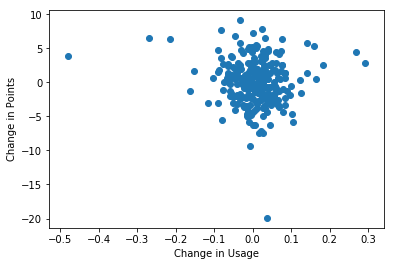

In [375]:
plt.scatter(past_four_years_adv['2016_TS%']-past_four_years_adv['2015_TS%'],past_four_years_adv['PS/G']-past_four_years_adv['2016_PS/G'])
plt.xlabel('Change in Usage')
plt.ylabel('Change in Points')

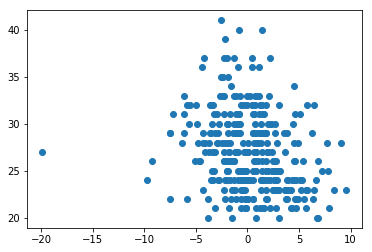

In [436]:
past_four_years_adv['pts_change'] = past_four_years_adv['PS/G']-past_four_years_adv['2016_PS/G']
plt.scatter(past_four_years_adv[past_four_years_adv['pts_change'].notna()]['pts_change'],past_four_years_adv[past_four_years_adv['pts_change'].notna()]['Age'])

In [412]:
print(past_four_years_adv.corr()['pts_change'][['Pos_minGain','2016_TotMinutes']])
print(np.abs(past_four_years_adv.corr()['pts_change']).sort_values(ascending=False))

Pos_minGain       -0.120645
2016_TotMinutes   -0.214438
Name: pts_change, dtype: float64
pts_change    1.000000
2016_OBPM     0.325491
2016_PS/G     0.302382
2016_MP_x     0.300662
2016_FG       0.300078
G             0.296590
MP            0.294046
2016_FGA      0.289112
2016_OWS      0.285824
2016_PER      0.282217
2016_BPM      0.271482
PF            0.270750
2016_2P       0.269349
2016_2PA      0.268369
FG            0.262730
2016_FT       0.262054
2016_WS       0.261081
2016_Age_x    0.256950
Age           0.256950
2016_Age_y    0.256950
2016_FTA      0.256148
FGA           0.253905
2015_MP_y     0.253826
PS/G          0.251480
2016_WS/48    0.243217
2016_GS       0.241336
2015_MP_x     0.240988
2014_FT       0.240189
2015_GS       0.238825
2PA           0.235563
                ...   
2014_3P       0.035676
2015_BLK%     0.035632
2016_AST%     0.034327
2016_BLK%     0.033979
2016_3PAr     0.033367
Rk            0.033365
2014_3PA      0.033347
2013_3PAr     0.032183
2013_FT%      

In [ ]:
Pos_minGain, 2016_TotMinutes

'''test differences vs actual points change, see which one predicts Points better.  It looks like there is too much noise'''

In [481]:
y = past_four_years_adv[(past_four_years_adv['2016_PS/G'].notna()) & (past_four_years_adv['2016_MP_x']>15)]['pts_change']
X = past_four_years_adv[(past_four_years_adv['2016_PS/G'].notna()) & (past_four_years_adv['2016_MP_x']>15)][[
    '2016_TotMinutes','Pos_minGain','Age','2016_OBPM','2016_MP_x','2016_OWS'
]]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2)

r2_lr = np.mean(cross_val_score(LinearRegression(),X_train,y_train,scoring = 'r2',cv=10,n_jobs=-1))
print('Linear_Regression: Last_four_years_points r^2 {}'.format(r2_lr))

r2_gb = np.mean(cross_val_score(GradientBoostingRegressor(loss='ls',learning_rate=0.01,n_estimators=5000,max_depth = 3,max_features=2
                                                        ),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('GradientBoost: Last_four_years_points r^2 {}'.format(r2_gb))

r2_rf = np.mean(cross_val_score(RandomForestRegressor(n_estimators=500,max_depth = 3,max_features=2),X_train,y_train,scoring = 'r2',cv=5,n_jobs=-1))
print('RandomForest: Last_four_years_points r^2 {}'.format(r2_rf))

Linear_Regression: Last_four_years_points r^2 0.02809605218519461
GradientBoost: Last_four_years_points r^2 -0.31197135056888814
RandomForest: Last_four_years_points r^2 0.05527685809302139


In [482]:
test = past_four_years_adv[(past_four_years_adv['2016_MP_x']>15) & (past_four_years_adv['2016_PS/G'].notna())].sort_values(by='Age',ascending=True)[['Player','2016_MP_x','2016_TotMinutes','PS/G','2016_PS/G','2015_PS/G','pts_change','Age','Pos_minGain','2016_OWS','2015_OWS','2016_TS%','2015_TS%','2016_WS','2015_WS']]

In [516]:
past_four_years_adv['Starter'] = (((past_four_years_adv['G']>20).astype(int)*past_four_years_adv['GS']/past_four_years_adv['G'])>0.5).astype(int)
past_four_years_adv['2016_Starter'] = (((past_four_years_adv['2016_G_x']>20).astype(int)*past_four_years_adv['2016_GS']/past_four_years_adv['2016_G_x'])>0.5).astype(int)

In [524]:
past_four_years_adv[(past_four_years_adv['2016_PS/G'].notna()) & (past_four_years_adv['2016_MP_x']>15)].groupby('2016_Starter').mean()['Starter']

2016_Starter
0    0.250000
1    0.737226
Name: Starter, dtype: float64

In [526]:
vets = past_four_years_adv[(past_four_years_adv['2016_PS/G'].notna()) & (past_four_years_adv['2016_MP_x']>15)]

In [553]:
starter_by_team = vets.groupby(['Tm','Pos']).sum()['2016_GS']/82

In [552]:
vets[vets['Tm']=='BOS'][['Player','Pos','GS']]

,Player,Pos,GS
28,Kyrie Irving,PG,60
30,Terry Rozier,PG,16
107,Aron Baynes,C,67
108,Al Horford,C,72
150,Jaylen Brown,SG,70
152,Marcus Smart,SG,11
390,Gordon Hayward,SF,1
467,Marcus Morris,PF,21


In [588]:
starter_by_team = vets.groupby(['Tm','Pos']).sum()['2016_GS']/82
tm_starters = (starter_by_team-1).reset_index()
tm_starters.columns = ['Tm','Pos','Starters_gained']
vets_2 = pd.merge(vets,tm_starters,how = 'inner', left_on = ['Tm','Pos'],right_on = ['Tm','Pos'])


In [563]:
Bos = vets_2[vets_2['Tm']=='BOS']

In [570]:
Bos_2 = pd.merge(Bos,Bos,how='inner',left_on = 'Pos',right_on='Pos')
Bos_2

,Rk_x_x,Player_x,Pos,Age_x,Tm_x,G_x,GS_x,MP_x,FG_x,FGA_x,...,2015_WS/48_y,2015_OBPM_y,2015_DBPM_y,2015_BPM_y,2015_VORP_y,Traded_y,pts_change_y,Starter_y,2016_Starter_y,Starters_gained_y
0,239,Kyrie Irving,PG,25,BOS,60,60,32.2,8.9,18.1,...,0.143,3.0,-1.4,1.6,1.5,False,-0.8,1,1,-0.121951
1,239,Kyrie Irving,PG,25,BOS,60,60,32.2,8.9,18.1,...,-0.047,-5.9,-0.8,-6.6,-0.4,False,5.8,0,0,-0.121951
2,435,Terry Rozier,PG,23,BOS,80,16,25.9,4.0,10.0,...,0.143,3.0,-1.4,1.6,1.5,False,-0.8,1,1,-0.121951
3,435,Terry Rozier,PG,23,BOS,80,16,25.9,4.0,10.0,...,-0.047,-5.9,-0.8,-6.6,-0.4,False,5.8,0,0,-0.121951
4,35,Aron Baynes,C,31,BOS,81,67,18.3,2.6,5.5,...,0.158,-1.3,1.1,-0.2,0.6,False,1.1,1,0,-0.146341
5,35,Aron Baynes,C,31,BOS,81,67,18.3,2.6,5.5,...,0.172,1.5,2.6,4.1,4.1,False,-1.1,1,1,-0.146341
6,227,Al Horford,C,31,BOS,72,72,31.6,5.1,10.5,...,0.158,-1.3,1.1,-0.2,0.6,False,1.1,1,0,-0.146341
7,227,Al Horford,C,31,BOS,72,72,31.6,5.1,10.5,...,0.172,1.5,2.6,4.1,4.1,False,-1.1,1,1,-0.146341
8,70,Jaylen Brown,SG,21,BOS,70,70,30.7,5.3,11.5,...,NaN,NaN,NaN,NaN,NaN,NaN,7.9,1,0,-0.463415
9,70,Jaylen Brown,SG,21,BOS,70,70,30.7,5.3,11.5,...,0.083,-0.6,1.3,0.7,1.1,False,-0.4,0,0,-0.463415


In [584]:
starter_by_team = past_four_years.groupby(['Tm','Pos']).sum()['2016_GS']/82
tm_starters = (starter_by_team-1).reset_index()
tm_starters.columns = ['Tm','Pos','Starters_gained']
vets_2 = pd.merge(vets,tm_starters,how = 'inner', left_on = ['Tm','Pos'],right_on = ['Tm','Pos'])


In [603]:
vets_2['reb_change']= vets_2['TRB']-vets_2['2016_TRB']

print(vets_2.groupby(['Starter','2016_Starter']).mean()['pts_change'])
print(vets_2.groupby(['Starter','2016_Starter']).mean()['reb_change'])

Starter  2016_Starter
0        0              -0.215625
         1              -2.605556
1        0               3.050000
         1               0.014851
Name: pts_change, dtype: float64
Starter  2016_Starter
0        0              -0.209375
         1              -1.344444
1        0               0.896875
         1              -0.003960
Name: reb_change, dtype: float64


In [601]:
for i in vets_2.columns:
    print(i)

Rk_x
Player
Pos
Age
Tm
G
GS
MP
FG
FGA
FG%
3P
3PA
3P%
2P
2PA
2P%
eFG%
FT
FTA
FT%
ORB
DRB
TRB
AST
STL
BLK
TOV
PF
PS/G
Traded_x
Rk_y
2016_Pos_x
2016_Age_x
2016_Tm_x
2016_G_x
2016_GS
2016_MP_x
2016_FG
2016_FGA
2016_FG%
2016_3P
2016_3PA
2016_3P%
2016_2P
2016_2PA
2016_2P%
2016_eFG%
2016_FT
2016_FTA
2016_FT%
2016_ORB
2016_DRB
2016_TRB
2016_AST
2016_STL
2016_BLK
2016_TOV
2016_PF
2016_PS/G
Traded_y
Rk_x
2015_Pos_x
2015_Age_x
2015_Tm_x
2015_G_x
2015_GS
2015_MP_x
2015_FG
2015_FGA
2015_FG%
2015_3P
2015_3PA
2015_3P%
2015_2P
2015_2PA
2015_2P%
2015_eFG%
2015_FT
2015_FTA
2015_FT%
2015_ORB
2015_DRB
2015_TRB
2015_AST
2015_STL
2015_BLK
2015_TOV
2015_PF
2015_PS/G
Traded_x
Rk_y
2014_Pos
2014_Age
2014_Tm
2014_G
2014_GS
2014_MP
2014_FG
2014_FGA
2014_FG%
2014_3P
2014_3PA
2014_3P%
2014_2P
2014_2PA
2014_2P%
2014_eFG%
2014_FT
2014_FTA
2014_FT%
2014_ORB
2014_DRB
2014_TRB
2014_AST
2014_STL
2014_BLK
2014_TOV
2014_PF
2014_PS/G
Traded_y
Rk
2013_Pos
2013_Age
2013_Tm
2013_G
2013_GS
2013_MP
2013_FG
2013_FGA
2013_FG%
201

In [2]:
ls

Creating ranking system.ipynb  __pycache__/
Format_Data.py                 testing.ipynb
Player_rank.py                 testing.py
Stat_predictions.ipynb


In [3]:
cd ..

/Users/rcheer/Desktop/Galvanize/Capstone/Fantasy-Basketball-Capstone-Project


In [6]:
df = pd.read_csv('Lebron stats.csv')

(array([ 3., 11., 14., 17., 22.,  8.,  5.,  1.,  0.,  1.]),
 array([10. , 14.7, 19.4, 24.1, 28.8, 33.5, 38.2, 42.9, 47.6, 52.3, 57. ]),
 <a list of 10 Patch objects>)

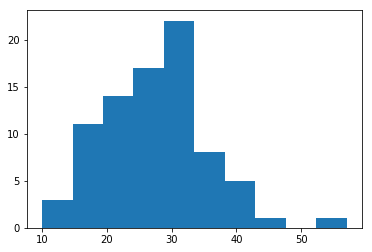

In [8]:
plt.hist(df.PTS)

(array([ 4.,  3.,  6., 11., 14.,  7., 21.,  6.,  8.,  2.]),
 array([ 1. ,  2.5,  4. ,  5.5,  7. ,  8.5, 10. , 11.5, 13. , 14.5, 16. ]),
 <a list of 10 Patch objects>)

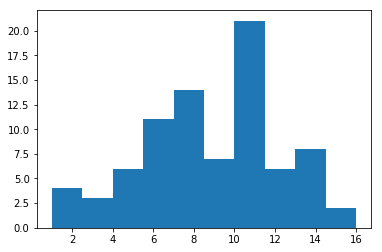

In [11]:
plt.hist(df.TRB)

In [10]:
df.head()

,Rk,G,Date,Age,Tm,Opp,Unnamed: 6,GS,MP,FG,...,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,GmSc,+/-
0,1,1,10/17/17,32-291,CLE,BOS,W (+3),1,41:12:00,12,...,15,16,9,0,2,4,3,29,28.2,2
1,2,2,10/20/17,32-294,CLE,MIL,W (+19),1,37:25:00,10,...,4,5,8,1,1,5,2,24,20.2,13
2,3,3,10/21/17,32-295,CLE,ORL,L (-21),1,31:12:00,8,...,4,4,2,1,1,1,0,22,17.6,-31
3,4,4,10/24/17,32-298,CLE,CHI,W (+7),1,37:15:00,13,...,2,2,13,3,0,2,1,34,35.1,7
4,5,5,10/25/17,32-299,CLE,BRK,L (-5),1,41:22:00,12,...,9,10,13,0,4,8,1,29,25.1,-2


(array([ 3.,  1., 16., 21.,  8., 13., 11.,  6.,  2.,  1.]),
 array([ 1. ,  2.8,  4.6,  6.4,  8.2, 10. , 11.8, 13.6, 15.4, 17.2, 19. ]),
 <a list of 10 Patch objects>)

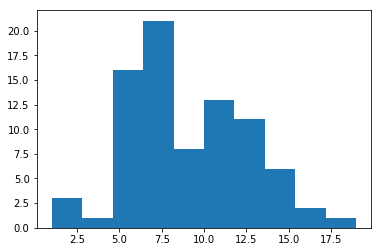

In [14]:
plt.hist(df.AST)